In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Detecting trends: Hodrick-Prescott filter (hp_filter)

The Hodrick-Prescott (HP) filter has become a benchmark for getting rid of trend movements in data. This method is broadly employed for econometric methods in applied macroeconomics research. The technique is nonparametric and is used to dissolve a time series into a trend; it is a cyclical component unaided by economic theory or prior trend specification.

This function takes two parameters into account:
- 1D array
- lambda (1600 for quarterly, 6.25 for annual, 129600 for monthly)


In [2]:
df = pd.read_excel('data/edge_techniques/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


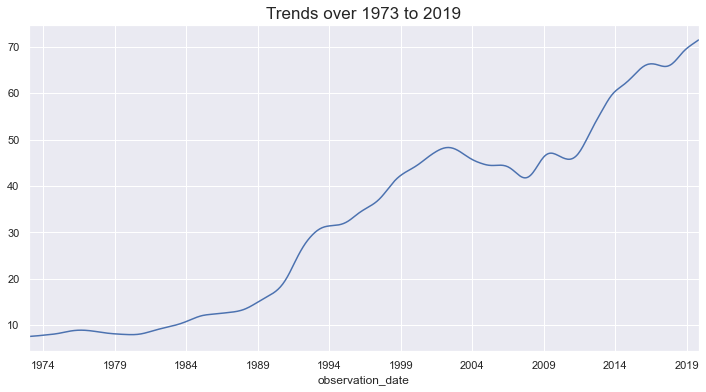

In [3]:
cycle, trend = hpfilter(df.EXINUS, lamb=1600)

title = f'Trends over {df.index.min().year} to {df.index.max().year}'
trend.plot(figsize=(12, 6)).autoscale(axis='x', tight=True)
plt.title(title, fontsize=17)
plt.show()

### Detrending a time series

Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time. It is continuously increasing or decreasing over the duration of time. Identification, modeling, and even removing trend data from time-series datasets can be beneficial. The following are methods to detrend time-series data:
- pandas differencing
- scipy signal
- hp filter

#### Pandas differencing


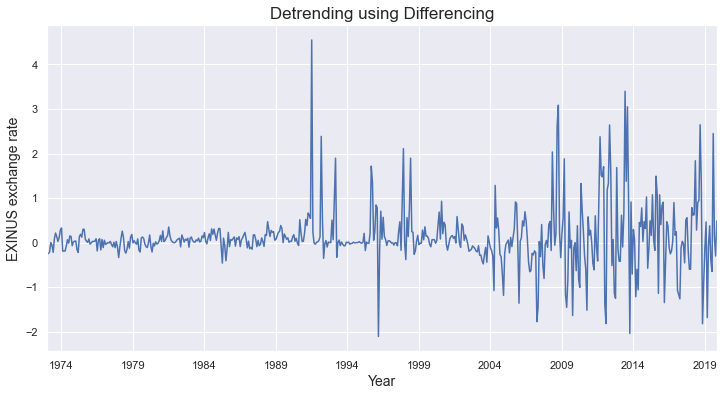

In [4]:
diff = df.EXINUS.diff()

diff.plot(figsize=(12, 6))
plt.title('Detrending using Differencing', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.ylabel('EXINUS exchange rate', fontsize=14)
plt.show()

### Detrending using a SciPy Signal

A signal is another form of time-series data . Every signal either increases or decreases in a different order. Using the SciPy library, this can be removing the linear trend from the signal data.

In [7]:
from scipy import signal

detrend = signal.detrend(df.EXINUS.values)
detrend

array([ 8.92541160e+00,  8.55481490e+00,  8.22721819e+00,  8.10662149e+00,
        7.93282479e+00,  7.59172808e+00,  7.55053138e+00,  7.64353468e+00,
        7.65893797e+00,  7.56574127e+00,  7.55234457e+00,  7.70804786e+00,
        7.91545116e+00,  7.60185446e+00,  7.29385775e+00,  6.98236105e+00,
        6.78206435e+00,  6.72526764e+00,  6.59047094e+00,  6.61977424e+00,
        6.63637754e+00,  6.44558083e+00,  6.33918413e+00,  6.24968743e+00,
        6.16419072e+00,  5.88559402e+00,  5.54359732e+00,  5.55740061e+00,
        5.62300391e+00,  5.62410721e+00,  5.80191050e+00,  5.98161380e+00,
        5.93661710e+00,  5.84602039e+00,  5.73062369e+00,  5.69362699e+00,
        5.53773028e+00,  5.40923358e+00,  5.31483688e+00,  5.22154018e+00,
        5.13594347e+00,  5.10004677e+00,  4.79215007e+00,  4.72405336e+00,
        4.68965666e+00,  4.40395996e+00,  4.35346325e+00,  4.12086655e+00,
        4.05226985e+00,  3.88937314e+00,  3.74817644e+00,  3.62907974e+00,
        3.49968303e+00,  

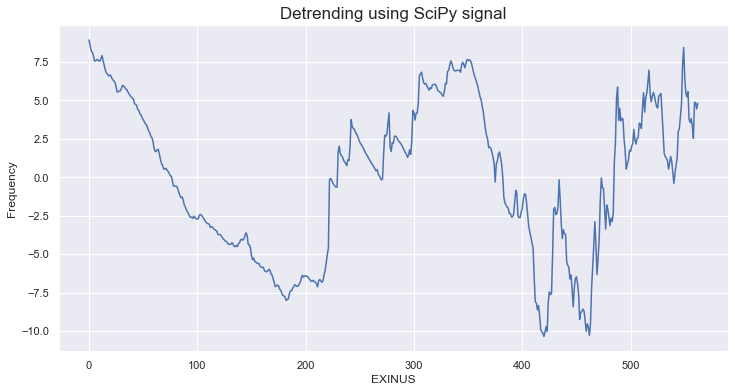

In [9]:
plt.figure(figsize=(12, 6))
plt.title('Detrending using SciPy signal', fontsize=17)
plt.plot(detrend)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.show()

### Detrending using HP filter

An HP filter is also used to detrend a time series and smooth the data. It’s used for removing short-term fluctuations.

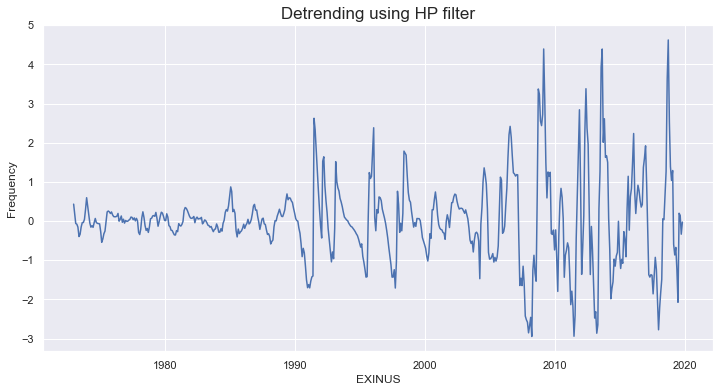

In [12]:
cycle, trend = hpfilter(df.EXINUS)

df['trend'] = trend
detrended = df.EXINUS - df['trend']

plt.figure(figsize=(12, 6))
plt.title('Detrending using HP filter', fontsize=17)
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.show()

### Multiple boxplot for TTA insights